# EM304 WC ANALYSIS WITH DIFFERENT X and C factor for TVG


## imports some library

In [1]:
import netCDF4  as nc
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize'] = [20, 20]


## define display function

In [27]:
def displayWC(file_path,swathNumber,filename,comment):
    with nc.Dataset(file_path) as dataset:
        reflectivity_count= dataset['/root/sonar/beam/backscatter_count']
        reflectivity_offset= dataset['/root/sonar/beam/backscatter_offset']
        sample_amplitude = dataset['/root/sonar/beam/backscatter_r']
        tvg_offset = dataset['/sounder/water_column/rx_info/tvg_offset']
        numOfPings = int(dataset["/sounder"].dimensions["swath_dim"].size)
        numOfBeams = dataset["/sounder/water_column/rx_info/num_beams"]

        #initialize ping (with nans)\n",
        max_samples = max(reflectivity_count[swathNumber])
        #fill ping with data\n",
        beamCount=int(numOfBeams[swathNumber][0])
        ping = np.zeros((beamCount, max_samples))
        ping.fill(float(np.nan))
        for bnr in range(beamCount):
            off=tvg_offset[swathNumber][0] #retrieve TVG offset set by kongberg
            ping[bnr][:reflectivity_count[swathNumber][bnr]] = sample_amplitude[reflectivity_offset[swathNumber][bnr]:reflectivity_offset[swathNumber][bnr] + reflectivity_count[swathNumber][bnr]]/2 -off #O.5 db encoding

        x= ping.reshape(beamCount*max_samples)
        x = x[~np.isnan(x)] #remove nan

        fig, axarr = plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})
        #plot the ping
        plt.rcParams['figure.dpi'] = 170
        im=axarr[0].imshow(ping.transpose(),aspect=0.2,cmap=plt.get_cmap("jet"));
        fig.colorbar(im,ax=axarr[0])
       
        axarr[1].hist(x, 256,density=False,orientation='horizontal')
        #axarr[1].set_title('values Histogram')
        axarr[1].set_xlabel("value")
        axarr[1].set_ylabel("density")
        axarr[1].set_autoscalex_on(False)
        axarr[1].set_xlim([0,10000])
        #fig.tight_layout()
        #fig.suptitle(filename + " " + comment)
        plt.grid(True)

        #plt.show()
        print(filename + " " + comment)
        print("Statistiques : min ",x.min(),", max ",x.max(),", mean",x.mean()," std ",x.std())


In [28]:
base_path="F://ESSTECH17//KMALL//BLACKMUD//"

## set the files paths and swath id

0028_20180908_212405.xsf DEEPER FM X=30 C=30
Statistiques : min  -94.0 , max  26.5 , mean -40.22197677412236  std  22.68167132877688


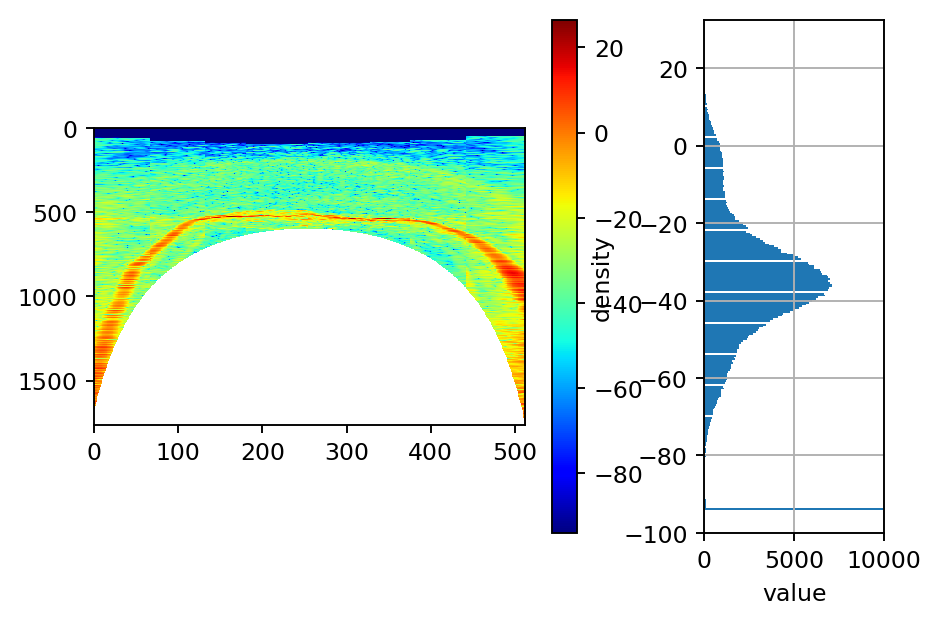

In [29]:
filename="0028_20180908_212405.xsf"
comment="DEEPER FM X=30 C=30"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0028_20180908_212405.xsf DEEPER FM X=30 C=30
Statistiques : min  -64.0 , max  56.5 , mean -10.221976774122364  std  22.68167132877688


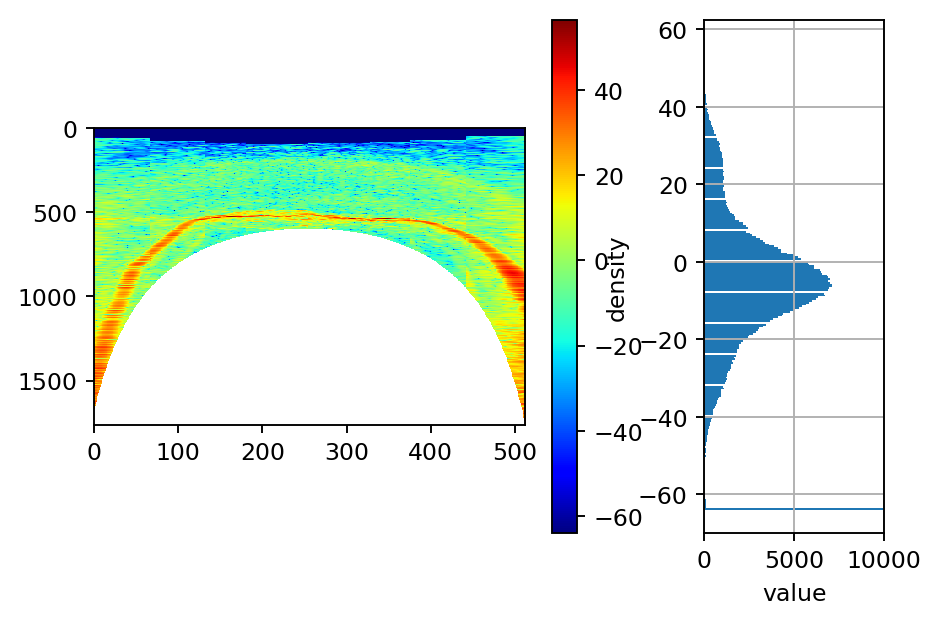

In [5]:
filename="0028_20180908_212405.xsf"
comment="DEEPER FM X=30 C=30"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0029_20180908_212633.xsf DEEPER FM X=30 C=40
Statistiques : min  -64.0 , max  63.5 , mean -1.0410404288897142  std  25.082779864639566


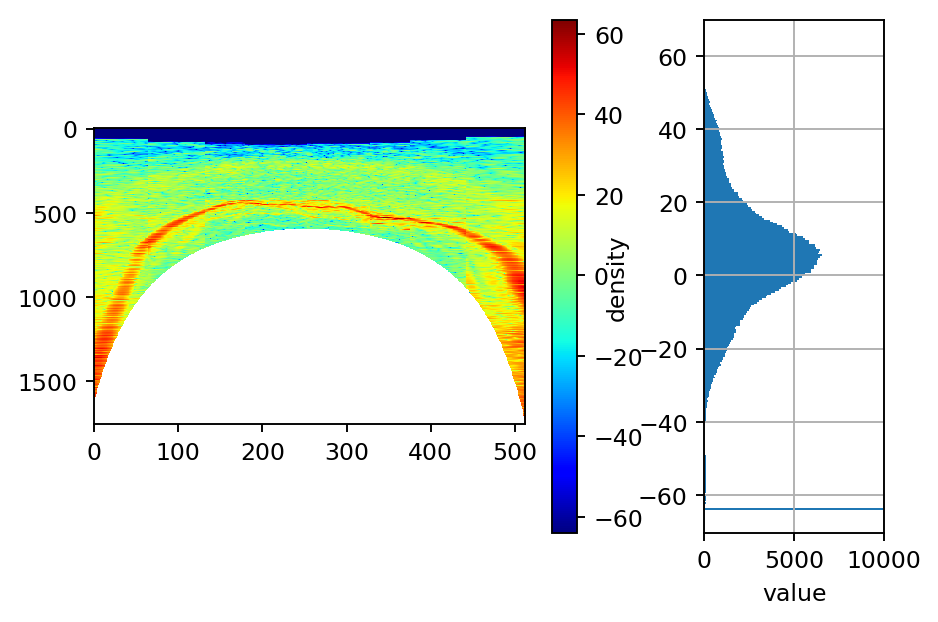

In [6]:
filename="0029_20180908_212633.xsf"
comment="DEEPER FM X=30 C=40"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0030_20180908_213248.xsf DEEPER FM X=30 C=40
Statistiques : min  -64.0 , max  63.5 , mean -2.3560007018587816  std  21.95248393784035


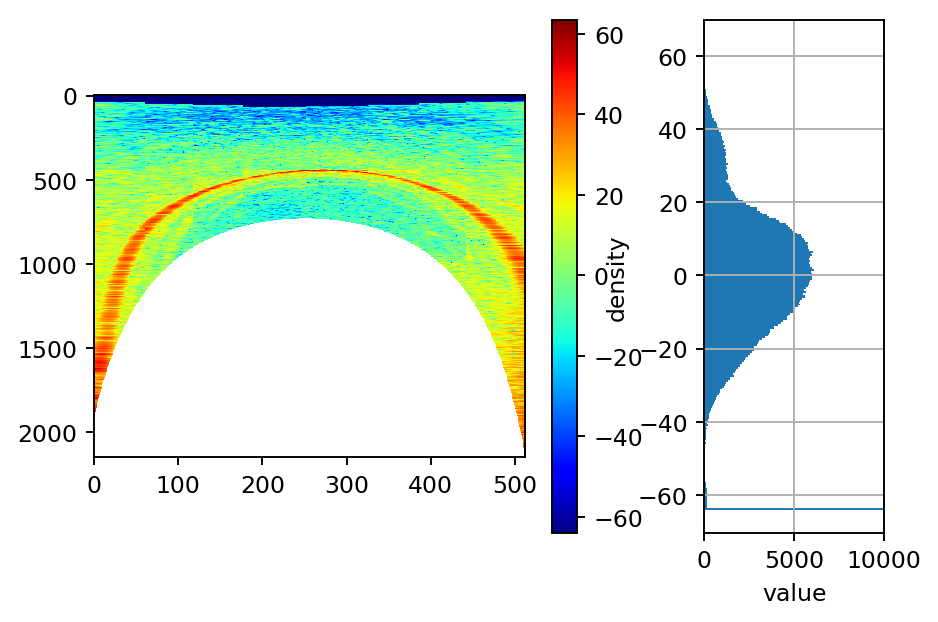

In [7]:
filename="0030_20180908_213248.xsf"
comment="DEEPER FM X=30 C=40"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0031_20180908_213753.xsf DEEP X=30 C=30
Statistiques : min  -64.0 , max  57.0 , mean -10.843345810358986  std  21.064869681156395


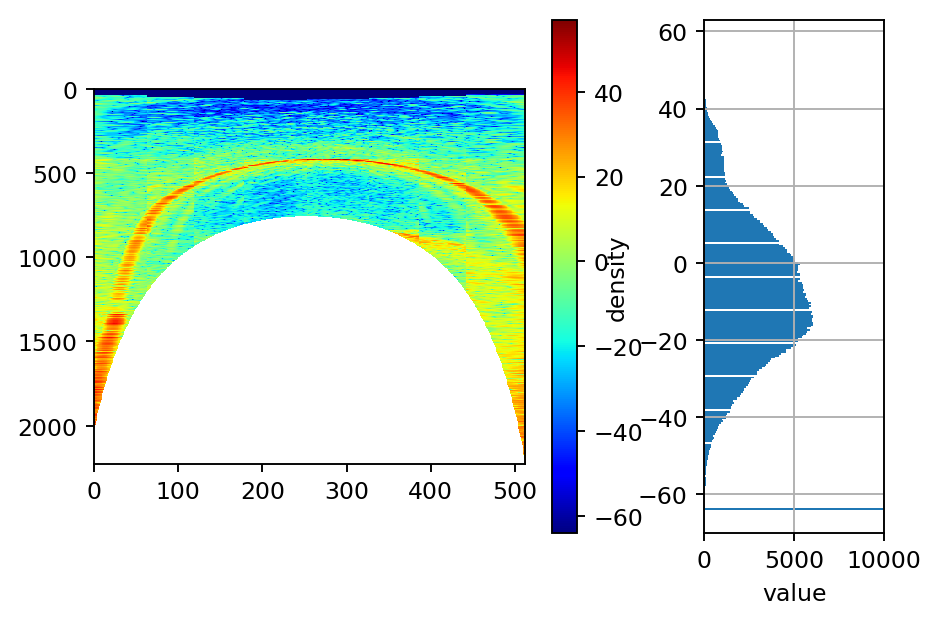

In [8]:
filename="0031_20180908_213753.xsf"
comment="DEEP X=30 C=30"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0034_20180908_220746.xsf DEEP X=20 C=30
Statistiques : min  -64.0 , max  26.0 , mean -37.84156824670603  std  16.404939854477387


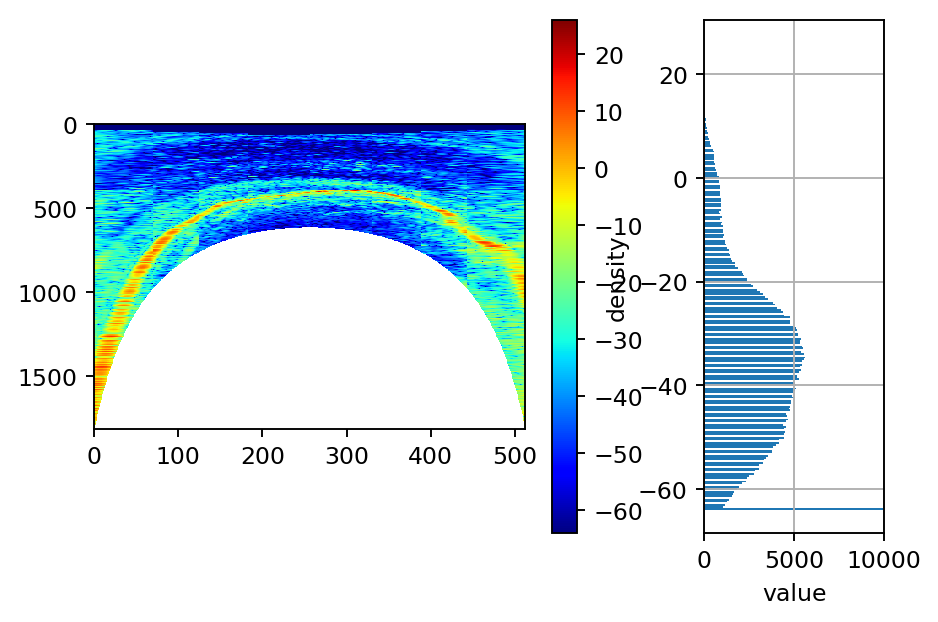

In [9]:
filename="0034_20180908_220746.xsf"
comment="DEEP X=20 C=30"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0035_20180908_221101.xsf DEEP X=20 C=40
Statistiques : min  -64.0 , max  42.5 , mean -29.324307290933408  std  17.593755282544738


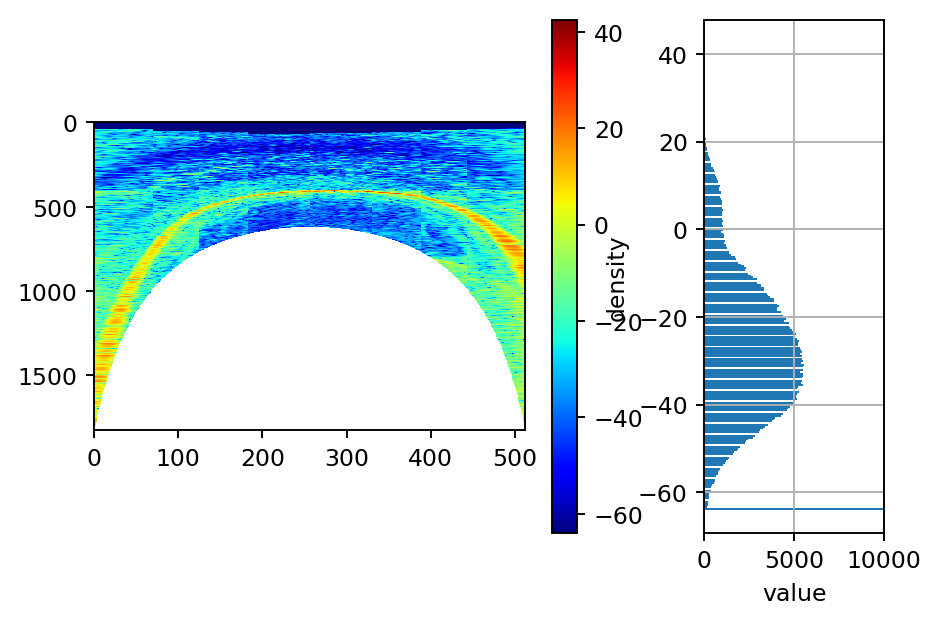

In [10]:
filename="0035_20180908_221101.xsf"
comment="DEEP X=20 C=40"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0036_20180908_221703.xsf DEEP X=30 C=40
Statistiques : min  -64.0 , max  63.5 , mean -2.407599340284975  std  24.083860348807598


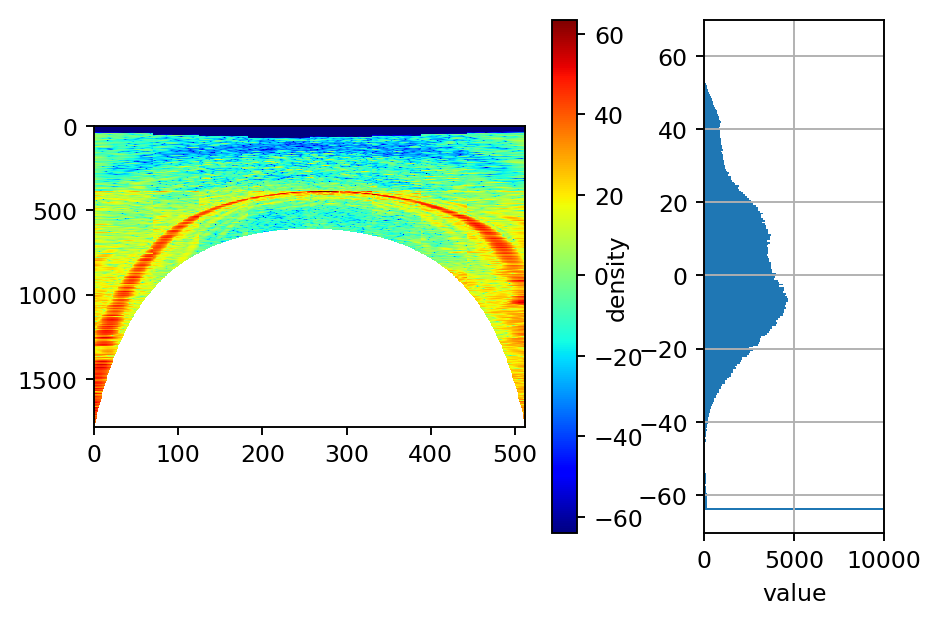

In [11]:
filename="0036_20180908_221703.xsf"
comment="DEEP X=30 C=40"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0038_20180908_225403.xsf MEDIUM X=30 C=30
Statistiques : min  -64.0 , max  53.0 , mean -4.347773459372221  std  14.844727822030443


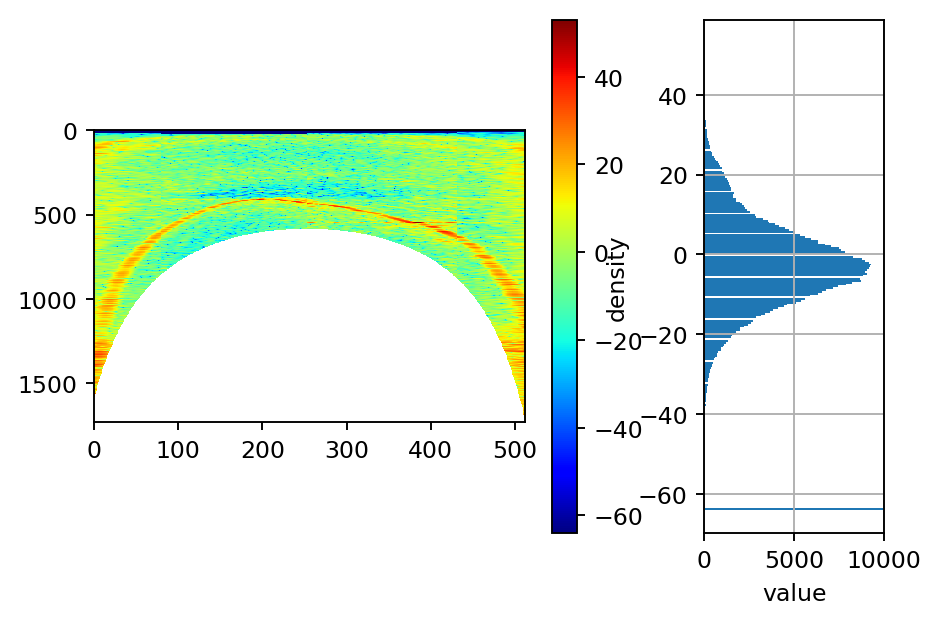

In [12]:
filename="0038_20180908_225403.xsf"
comment="MEDIUM X=30 C=30"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0039_20180908_230608.xsf MEDIUM X=30 C=40
Statistiques : min  -64.0 , max  63.5 , mean 5.268788916088533  std  17.432749497358664


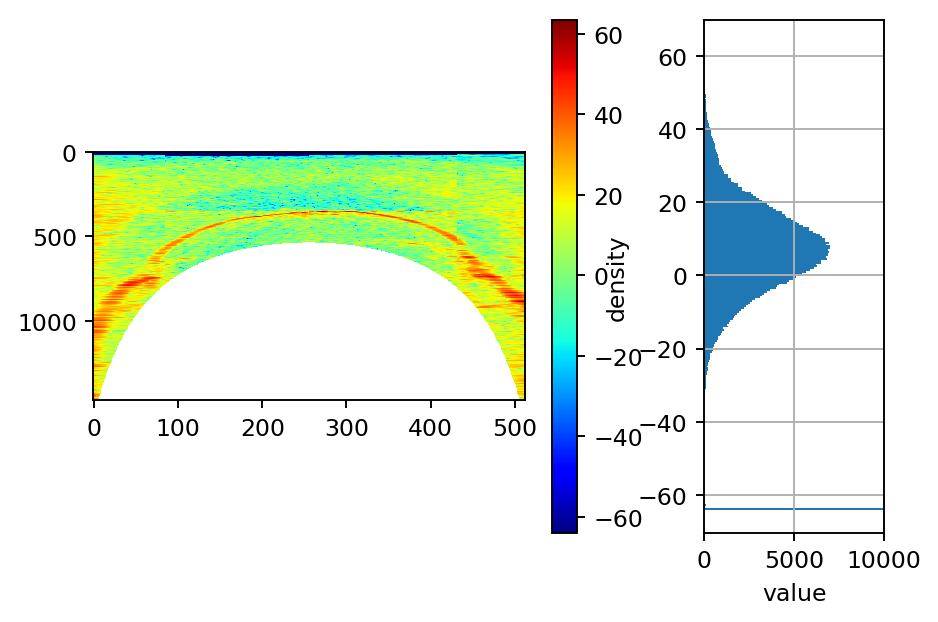

In [13]:
filename="0039_20180908_230608.xsf"
comment="MEDIUM X=30 C=40"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0040_20180908_231119.xsf MEDIUM X=20 C=40
Statistiques : min  -64.0 , max  34.0 , mean -20.172901610983644  std  14.409323236412128


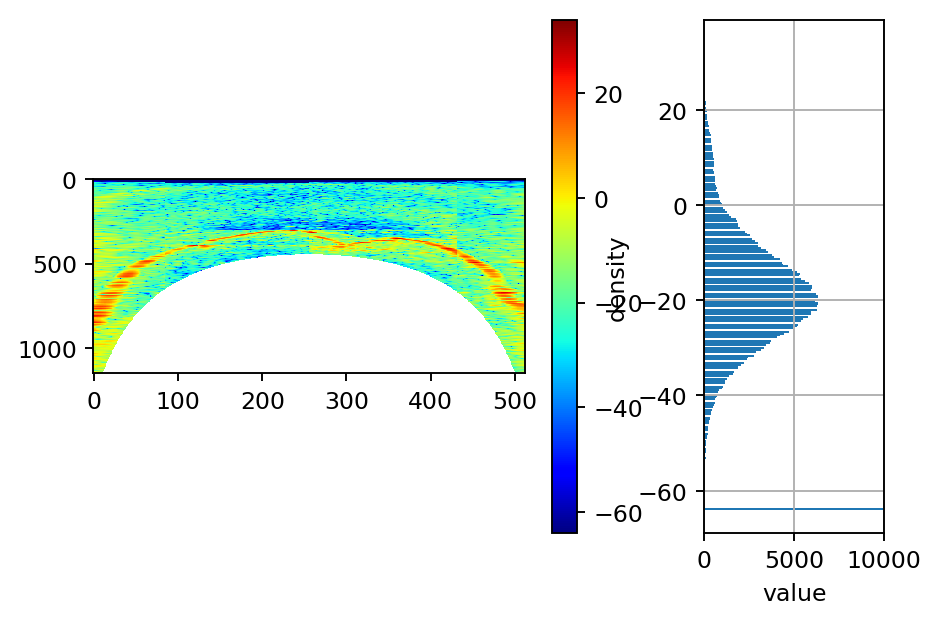

In [14]:
filename="0040_20180908_231119.xsf"
comment="MEDIUM X=20 C=40"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0041_20180908_231557.xsf MEDIUM X=20 C=30
Statistiques : min  -64.0 , max  27.5 , mean -34.193006314262554  std  14.031048516697682


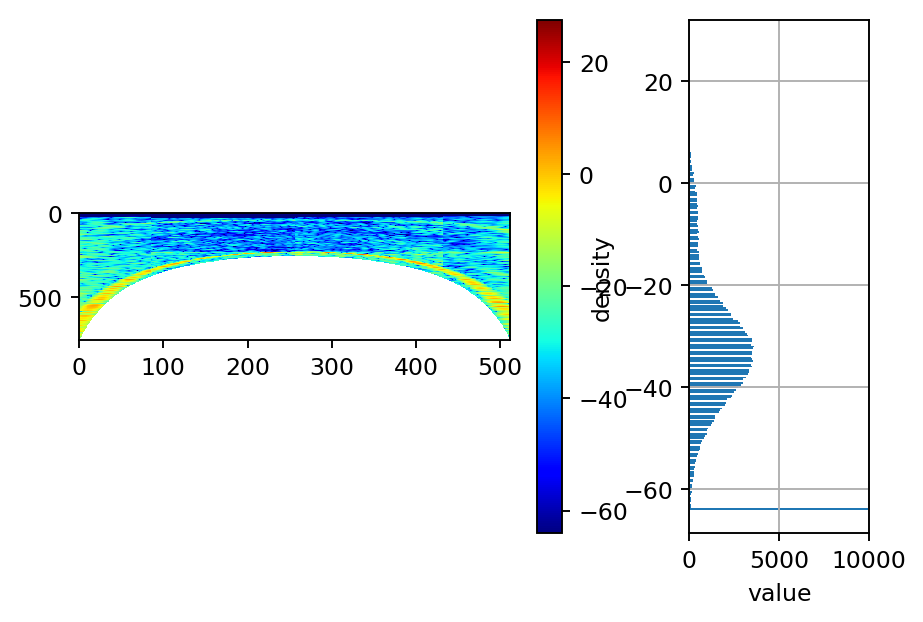

In [15]:
filename="0041_20180908_231557.xsf"
comment="MEDIUM X=20 C=30"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0042_20180908_232005.xsf MEDIUM X=20 C=0
Statistiques : min  -64.0 , max  -1.5 , mean -59.22357457561228  std  8.538926323428685


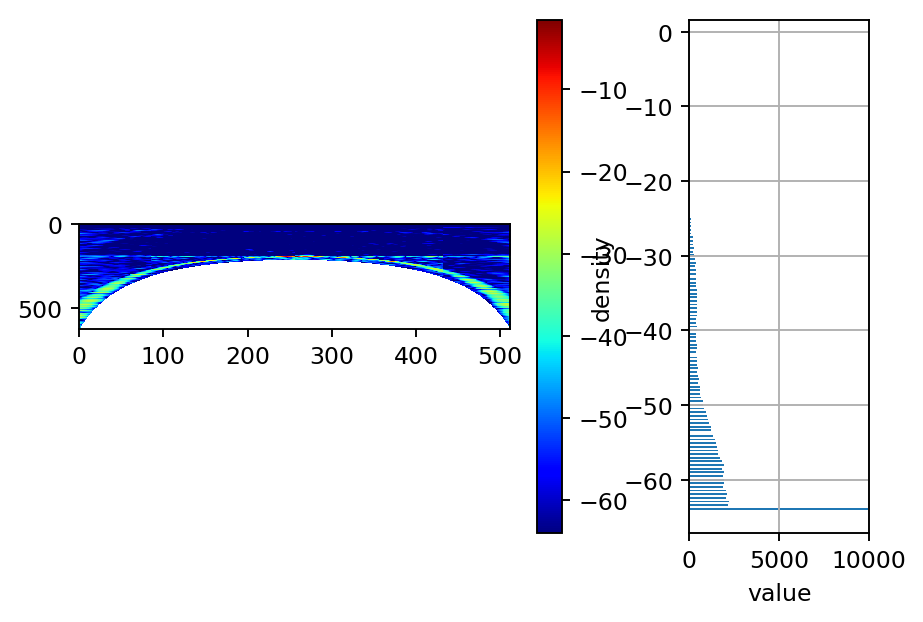

In [16]:
filename="0042_20180908_232005.xsf"
comment="MEDIUM X=20 C=0"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0047_20180908_233739.xsf MEDIUM X=30 C=0
Statistiques : min  -64.0 , max  22.5 , mean -40.93849945752158  std  16.085275578512995


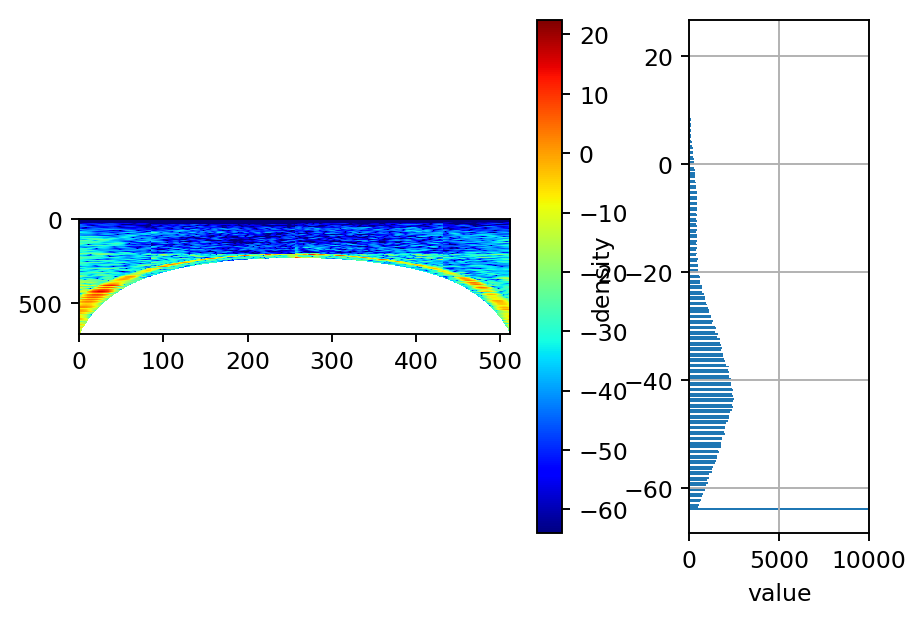

In [17]:
filename="0047_20180908_233739.xsf"
comment="MEDIUM X=30 C=0"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0043_20180908_232300.xsf SHALLOW X=30 C=0
Statistiques : min  -64.0 , max  31.0 , mean -47.42319622096873  std  16.773224462044002


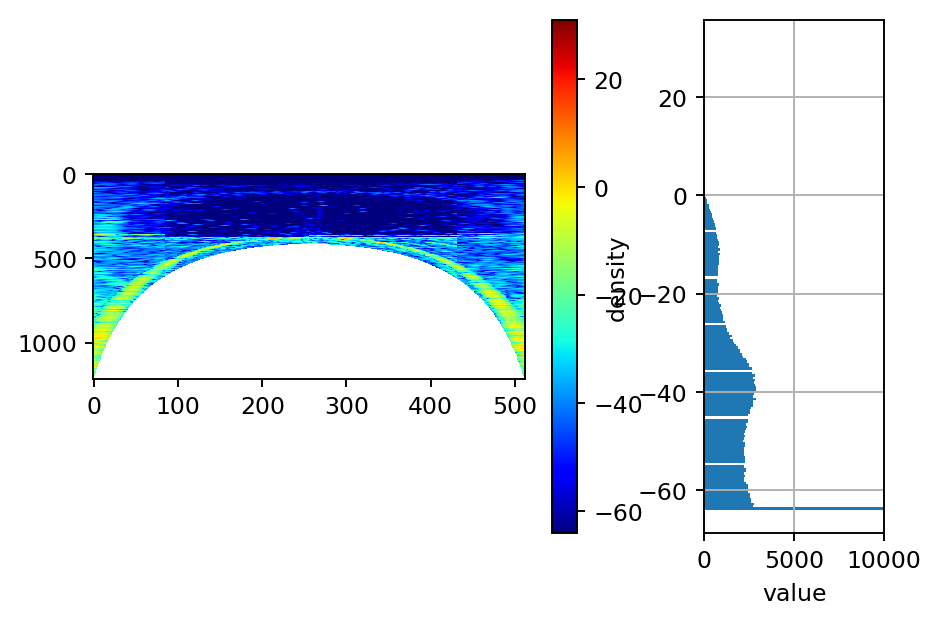

In [26]:
filename="0043_20180908_232300.xsf"
comment="SHALLOW X=30 C=0"
file_path= base_path + filename
swathNumber=12
displayWC(file_path,swathNumber,filename,comment)

0044_20180908_232505.xsf SHALLOW X=30 C=30
Statistiques : min  -64.0 , max  63.0 , mean -21.92020044354668  std  22.766697735450055


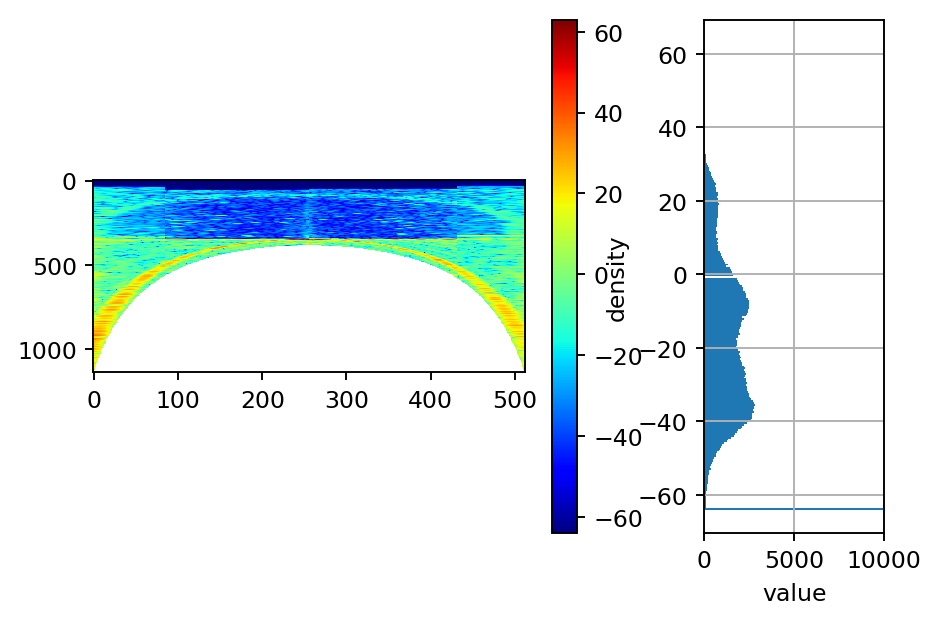

In [19]:
filename="0044_20180908_232505.xsf"
comment="SHALLOW X=30 C=30"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0045_20180908_233053.xsf SHALLOW X=30 C=40
Statistiques : min  -64.0 , max  63.5 , mean -10.039063525964018  std  23.532615545815734


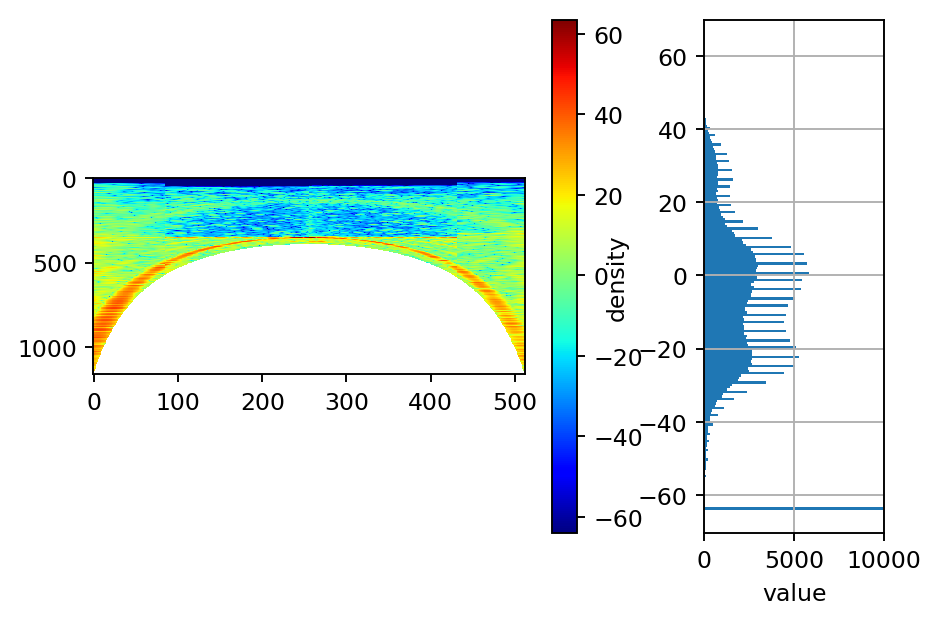

In [25]:
filename="0045_20180908_233053.xsf"
comment="SHALLOW X=30 C=40"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)